In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter

C:\Users\Acer\AppData\Local\Temp\ipykernel_10084\3038822441.py:4: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [12]:
dfcovid = pd.read_csv('Colombia_COVID19_Coronavirus_casos_diarios.csv', index_col=False)

dfcovid.head()

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS   
0      1237             1            1              0                  0  \
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID   
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61  \
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  
0               0                  0  
1               0                  0  
2               0                  0  
3               0                  0  
4               0                  0

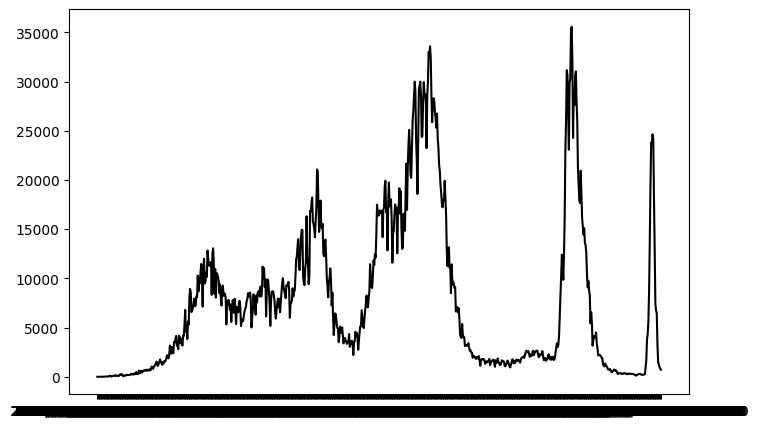

In [13]:
plt.figure(figsize=[8,5])  # creamos la figura.  plt.figure(figsize=[8,5])
plt.plot(dfcovid['FECHA_ACTUALIZACION'], dfcovid['NUEVOS_CASOS'], color='k')  # grafica. importante
# columna y son los nuevos casos lo otro son las fechas.

In [14]:
# Estandarizando/Normalizando.

# Se hace una copia del df original por si algo. Ocupa memoria, por lo que si se lanza se debe evitar esto.
df_max_scales = dfcovid.copy()

# Normalizando.  # aqui le agreamos una nueva columna al dataframe si normalizamos.
df_max_scales['norm_new_cases']  = df_max_scales['NUEVOS_CASOS']/df_max_scales['NUEVOS_CASOS'].abs().max()
#df_max_scales["NUEVOS_CASOS"]/df_max_scales["NUEVOS_CASOS"].abs().max()

df_max_scales.head() # ya tenemos la columna normalizada.

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS   
0      1237             1            1              0                  0  \
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID   
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61  \
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  norm_new_cases  
0               0                  0        0.000028  
1               0                  0        0.000000  
2               0                  0        0.000000  
3               0                  0        0.000056  
4               0                  0        0.000000

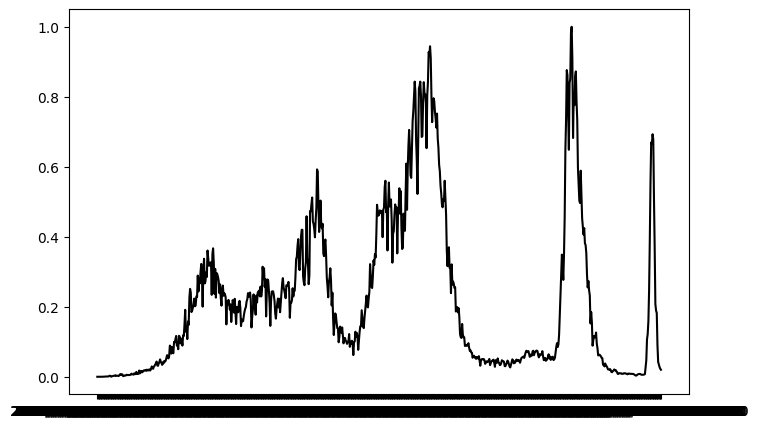

In [15]:
plt.figure(figsize=[8,5])
plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['norm_new_cases'], color='k')
# graficamos los casos normalizados. 

In [16]:
# Las columnas, especialmente las fechas, deben organizarse de mayor a menor.  # de mayor a menor
# SIEMPRE revisar esto; deben organizarse las fechas.

# Aplicando el kernel gaussiano.

r = 1  # ojo
h = 1
df_max_scales['gaussian_smoothed'] = gaussian_filter(df_max_scales['norm_new_cases'], h)
# creamos una columna con  el filtro gaussiano
df_max_scales.head() # mostramos los primeros valores con el filtro  gaussiano

OBJECTID  NUEVOS_CASOS  TOTAL_CASOS  TOTAL_MUERTES  TOTAL_RECUPERADOS   
0      1237             1            1              0                  0  \
1      1238             0            1              0                  0   
2      1239             0            1              0                  0   
3      1240             2            3              0                  0   
4      1241             0            3              0                  0   

      FECHA_ACTUALIZACION                              GlobalID   
0  2020/03/06 05:00:00+00  bfbde439-2467-4f24-9b33-2fb38e3abd61  \
1  2020/03/07 05:00:00+00  c21b35c0-d55e-44e0-8768-9356c9c1d545   
2  2020/03/08 05:00:00+00  0a1a91f7-15eb-4118-9879-1ab4d959b1d2   
3  2020/03/09 05:00:00+00  2fb6f539-a27c-4d00-84e1-b19193ceb500   
4  2020/03/10 05:00:00+00  f14b28c9-d593-4a53-9e2a-d7965c38c22c   

   NUEVOS_MUERTOS  NUEVO_RECUPERADOS  norm_new_cases  gaussian_smoothed  
0               0                  0        0.000028           0.000018  
1               0                  0        0.000000           0.000011  
2               0                  0        0.000000           0.000016  
3               0                  0        0.000056           0.000032  
4               0                  0        0.000000           0.000061

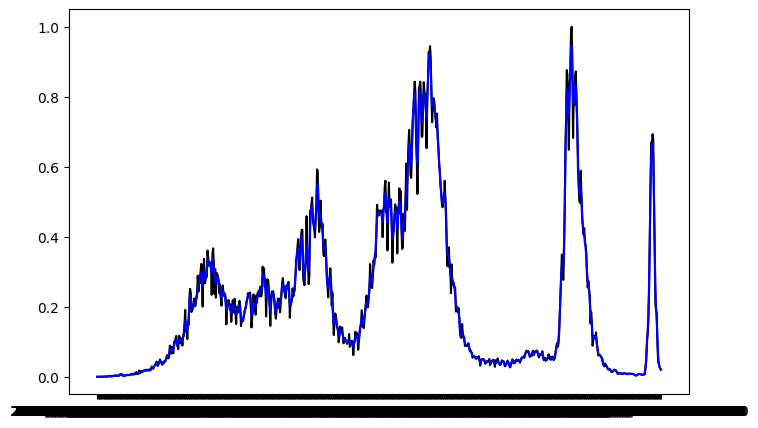

In [17]:
plt.figure(figsize=[8,5])
plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['norm_new_cases'], color='k')
plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['gaussian_smoothed'], color='b')
# graficamos los datos normalizados
# graficamos el ajuste gaussiano y su filtro.

809


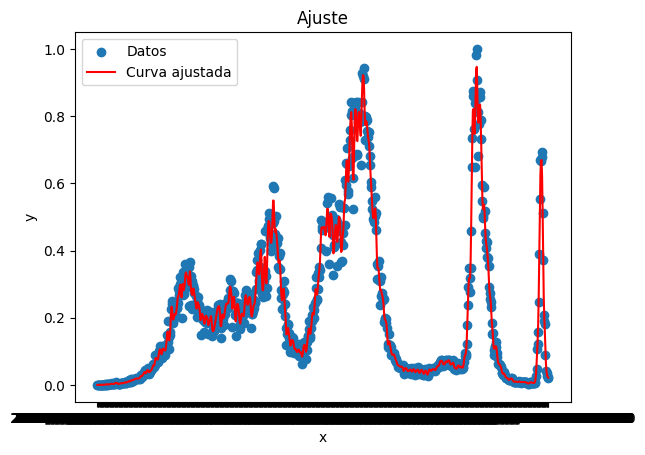

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d           # tenemos otra funcion de filtro gaussiano.
 # usemos esto para los datos.
# Datos
x = df_max_scales["FECHA_ACTUALIZACION"]  # fechas de actualizacion
print(len(x))
y = df_max_scales["norm_new_cases"]   # casos normalizados.

# Parámetros del filtro gaussiano
sigma = 1.0  # Controla la suavidad del filtro

# Aplicar filtro gaussiano a los datos
y_filtered = gaussian_filter1d(y, sigma)

# Graficar los datos y la curva ajustada
plt.scatter(x, y, label='Datos')
plt.plot(x, y_filtered, color='red', label='Curva ajustada')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste')
plt.show() 

# aqui unicamente hemos hecho el kernel con las librerias
#ahora procedemos a realizarlo con manualmente con lo que tenemos.

In [28]:
df_max_scales["FECHA_NUEVA"]=pd.to_datetime(df_max_scales["FECHA_ACTUALIZACION"])

smoothed_cases = []
for date in sorted(df_max_scales['FECHA_NUEVA']):
    df_max_scales['gaussian'] =(3/4)*(1
        -(((df_max_scales['FECHA_NUEVA'] - date).apply(lambda x: x.days)) ** 2) / ( (1))
    )
    df_max_scales['gaussian'] /= df_max_scales['gaussian'].sum()
    smoothed_cases.append(round(df_max_scales['NUEVOS_CASOS'] * df_max_scales['gaussian']).sum())

df_max_scales['smoothed_new_cases'] = smoothed_cases
print(smoothed_cases)

[7744.0, 7742.0, 7738.0, 7732.0, 7732.0, 7732.0, 7731.0, 7725.0, 7724.0, 7721.0, 7722.0, 7716.0, 7714.0, 7706.0, 7705.0, 7704.0, 7699.0, 7695.0, 7692.0, 7689.0, 7687.0, 7688.0, 7677.0, 7678.0, 7674.0, 7674.0, 7673.0, 7667.0, 7668.0, 7669.0, 7667.0, 7662.0, 7660.0, 7653.0, 7648.0, 7648.0, 7642.0, 7642.0, 7638.0, 7637.0, 7639.0, 7636.0, 7633.0, 7622.0, 7621.0, 7616.0, 7612.0, 7615.0, 7607.0, 7604.0, 7607.0, 7605.0, 7600.0, 7597.0, 7593.0, 7593.0, 7594.0, 7592.0, 7590.0, 7588.0, 7591.0, 7589.0, 7582.0, 7581.0, 7574.0, 7578.0, 7572.0, 7572.0, 7569.0, 7564.0, 7560.0, 7558.0, 7553.0, 7552.0, 7556.0, 7550.0, 7546.0, 7545.0, 7542.0, 7537.0, 7530.0, 7525.0, 7528.0, 7525.0, 7519.0, 7516.0, 7511.0, 7506.0, 7497.0, 7489.0, 7484.0, 7482.0, 7480.0, 7479.0, 7474.0, 7460.0, 7456.0, 7451.0, 7447.0, 7436.0, 7433.0, 7429.0, 7424.0, 7421.0, 7415.0, 7410.0, 7410.0, 7408.0, 7401.0, 7397.0, 7388.0, 7390.0, 7384.0, 7382.0, 7375.0, 7370.0, 7365.0, 7357.0, 7358.0, 7356.0, 7354.0, 7351.0, 7346.0, 7345.0, 7344.0,

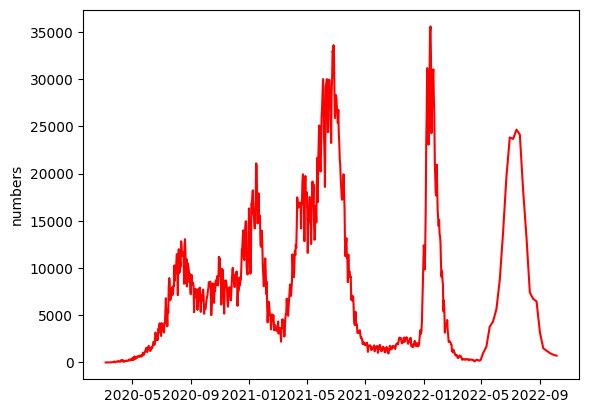

In [64]:
plt.plot(df_max_scales["FECHA_NUEVA"],df_max_scales["NUEVOS_CASOS"],color="red")
#plt.plot(df_max_scales["FECHA_NUEVA"],df_max_scales["smoothed_new_cases"],color="purple")


plt.ylabel('numbers')
plt.show()

In [51]:
def kern_gauss1(xn, xm, r):
    
    l = []
    xma = np.arange(len(xm))
    for i in range (0, len(xn), 1):
        k = (3/4)*(1-( (xn[i]-1)**2/1  ) )
        l.append(k)
    return l

In [52]:
df_max_scales['gaussian_smoothed_v4'] = kern_gauss1(df_max_scales['norm_new_cases'], df_max_scales['FECHA_ACTUALIZACION'], r)

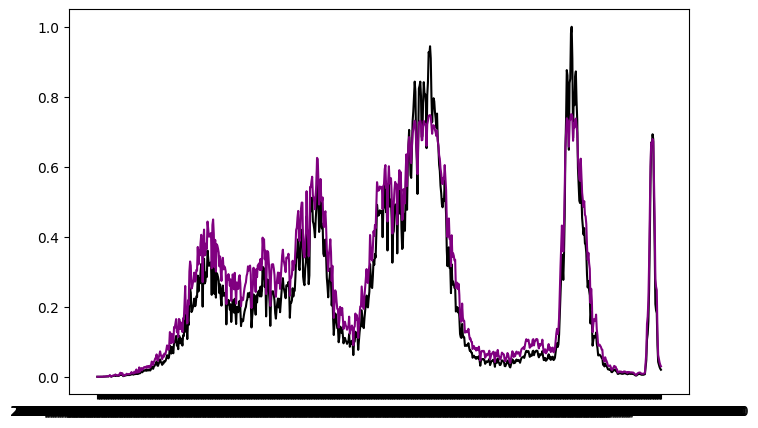

In [55]:
plt.figure(figsize=[8,5])
plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['norm_new_cases'], color='k')
#plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['gaussian_smoothed'], color='b')
plt.plot(df_max_scales['FECHA_ACTUALIZACION'], df_max_scales['gaussian_smoothed_v4'], color='purple')
# el ajuste final gaussiano